In [3]:
pip install tbats

/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


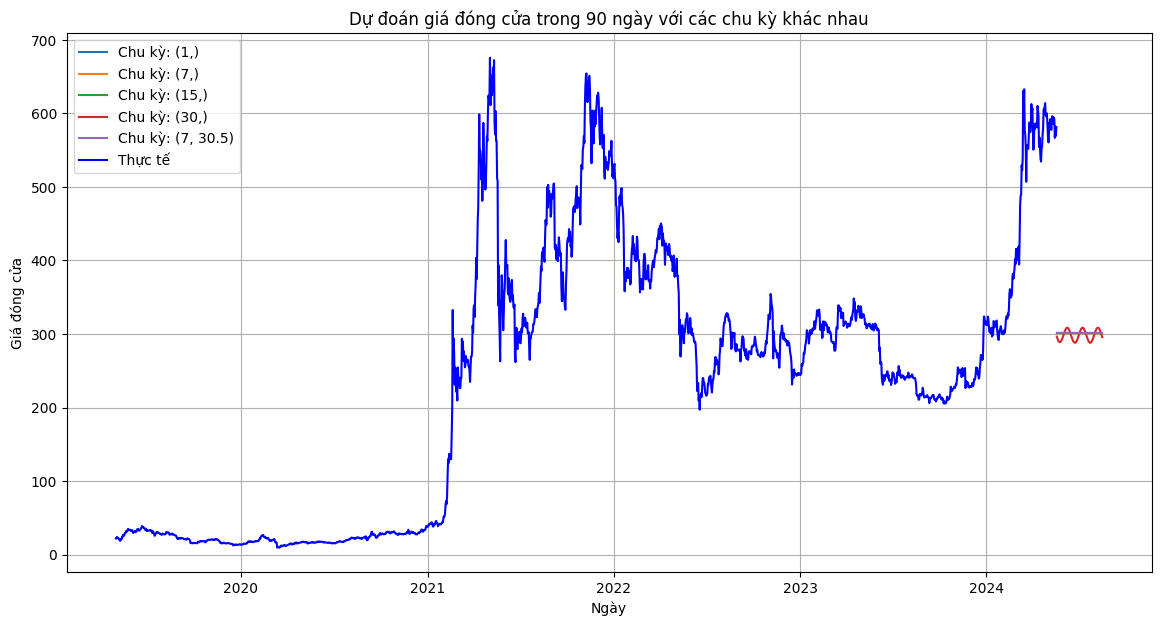

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from tbats import TBATS
from datetime import timedelta

def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
    data = data['Close'].resample('D').mean()
    data = data.fillna(method='ffill')
    return data

def train_tbats_models(train, seasonal_periods):
    results = {}
    for periods in seasonal_periods:
        estimator = TBATS(seasonal_periods=periods)
        model = estimator.fit(train)
        forecast = model.forecast(steps=90)
        results[periods] = forecast
    return results

def plot_forecasts(data, results):
    plt.figure(figsize=(14, 7))
    forecast_index = [data.index[-1] + timedelta(days=i) for i in range(1, 91)]

    for periods, forecast in results.items():
        plt.plot(forecast_index, forecast, label=f'Chu kỳ: {periods}')

    plt.plot(data.index, data.values, label='Thực tế', color='blue')
    plt.title('Dự đoán giá đóng cửa trong 90 ngày với các chu kỳ khác nhau')
    plt.xlabel('Ngày')
    plt.ylabel('Giá đóng cửa')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

def main():
    filepath = '/content/BNB-USD.csv'
    data = load_and_preprocess_data(filepath)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    train_size = int(len(data) * 0.7)
    train, test = data[:train_size], data[train_size:]

    # Định nghĩa các chu kỳ mùa vụ khác nhau để thử nghiệm
    seasonal_periods = [(1,), (7,), (15,), (30,), (7, 30.5)]

    # Huấn luyện các mô hình TBATS
    results = train_tbats_models(train, seasonal_periods)

    # Vẽ biểu đồ dự đoán
    plot_forecasts(data, results)

if __name__ == "__main__":
    main()


Train Size: 1315, RMSE: 9729.46, MSE: 94662319.70, MAPE: 12.89%, MAE: 7286.91


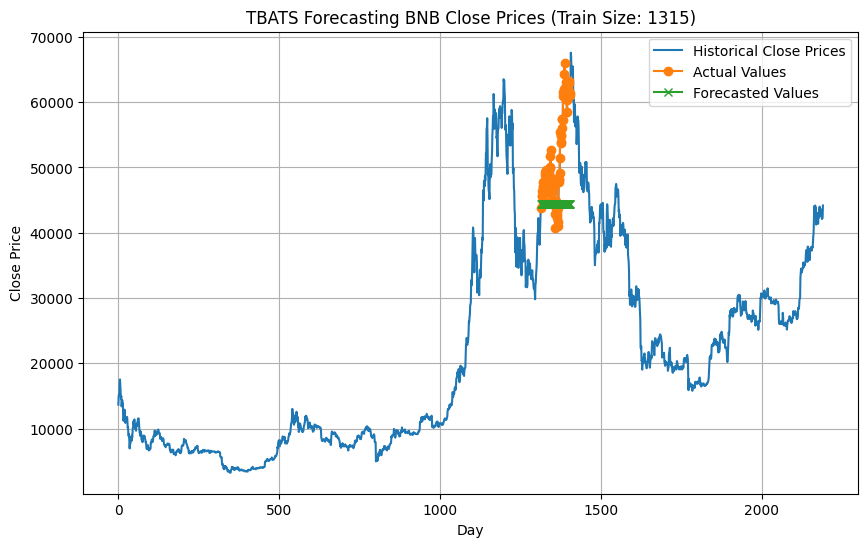

Train Size: 1534, RMSE: 6763.99, MSE: 45751623.76, MAPE: 16.78%, MAE: 5504.62


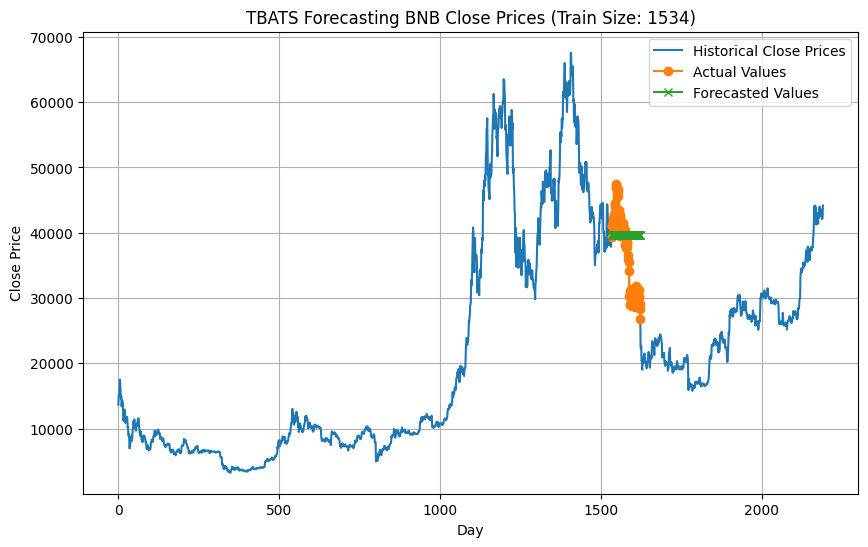

Train Size: 1753, RMSE: 2109.01, MSE: 4447910.68, MAPE: 11.46%, MAE: 1984.60


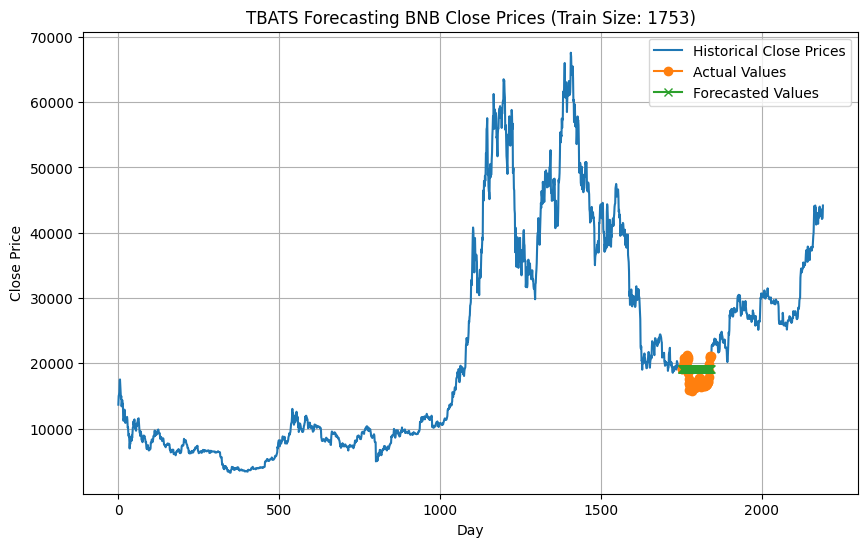

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/BTC-USD.csv')

# Chuyển đổi cột ngày tháng sang datetime nếu cần thiết
df['Date'] = pd.to_datetime(df['Date'])

# Sắp xếp lại dữ liệu theo ngày tháng nếu cần thiết
df = df.sort_values('Date').reset_index(drop=True)

# Chọn cột giá đóng cửa làm dữ liệu
close_prices = df['Close']

# Hàm tính Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm đánh giá và vẽ biểu đồ
def evaluate_and_plot(train_size):
    # Chia dữ liệu thành train và test theo tỷ lệ train_size
    train_size = int(len(close_prices) * train_size)
    train_data = close_prices[:train_size]
    test_data = close_prices[train_size:]

    # Huấn luyện mô hình TBATS
    model = TBATS(seasonal_periods=[7, 30])  # Chọn các chu kỳ mùa theo ngày và tháng
    model_fit = model.fit(train_data)

    # Dự đoán giá đóng cửa cho 30, 60, 90 ngày tiếp theo
    forecast_horizon = [30, 60, 90]
    forecasts = model_fit.forecast(steps=max(forecast_horizon))

    # Lấy giá trị thực tế của test_data
    actual_values = np.array(test_data[:max(forecast_horizon)])

    # Tính toán các độ đo
    rmse = np.sqrt(mean_squared_error(actual_values, forecasts[:len(actual_values)]))
    mse = mean_squared_error(actual_values, forecasts[:len(actual_values)])
    mape = mean_absolute_percentage_error(actual_values, forecasts[:len(actual_values)])
    mae = mean_absolute_error(actual_values, forecasts[:len(actual_values)])

    # In kết quả đánh giá
    print(f"Train Size: {train_size}, RMSE: {rmse:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, MAE: {mae:.2f}")

    # Vẽ biểu đồ dự đoán và giá trị thực tế
    plt.figure(figsize=(10, 6))
    plt.plot(close_prices, label='Historical Close Prices')
    plt.plot(np.arange(train_size, train_size + len(actual_values)), actual_values, label='Actual Values')
    plt.plot(np.arange(train_size, train_size + len(forecasts)), forecasts, label='Forecasted Values')
    plt.title(f'TBATS Forecasting BNB Close Prices (Train Size: {train_size})')
    plt.xlabel('Day')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đánh giá và vẽ biểu đồ cho các tỷ lệ train-test khác nhau
evaluate_and_plot(0.6)  # Train-test ratio 6:4
evaluate_and_plot(0.7)  # Train-test ratio 7:3
evaluate_and_plot(0.8)  # Train-test ratio 8:2


/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1315, RMSE: 9729.46, MSE: 94662319.70, MAPE: 12.89%, MAE: 7286.91


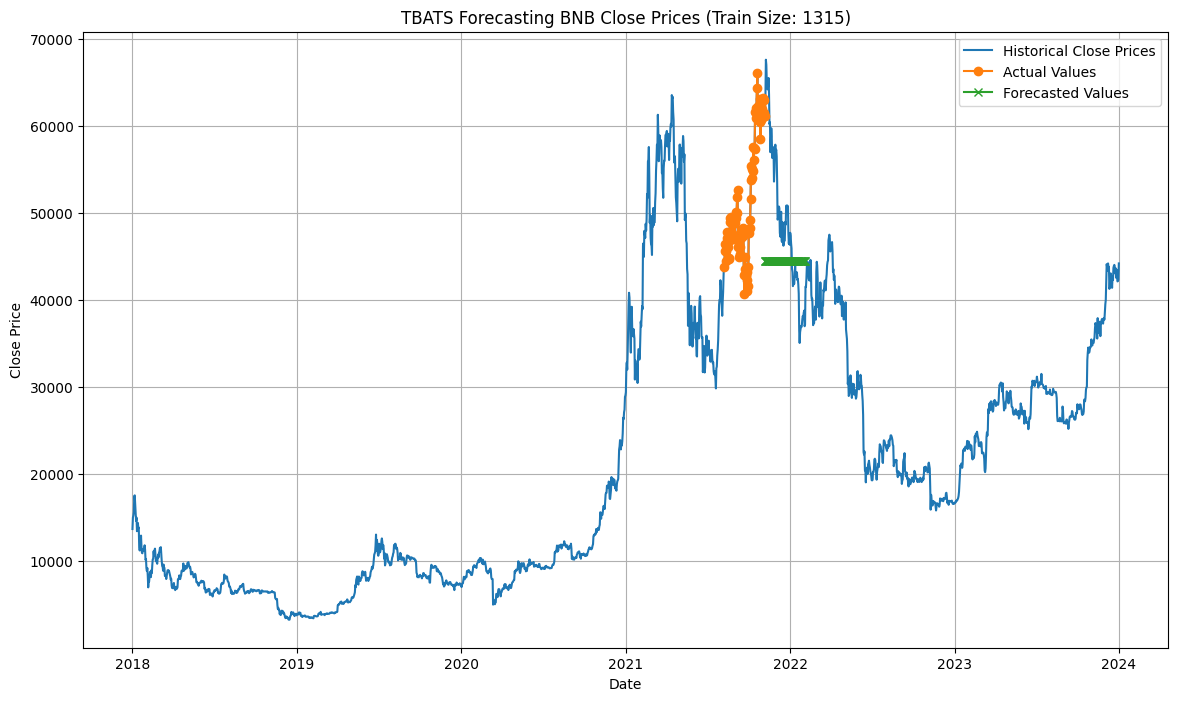

/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1534, RMSE: 6763.99, MSE: 45751623.76, MAPE: 16.78%, MAE: 5504.62


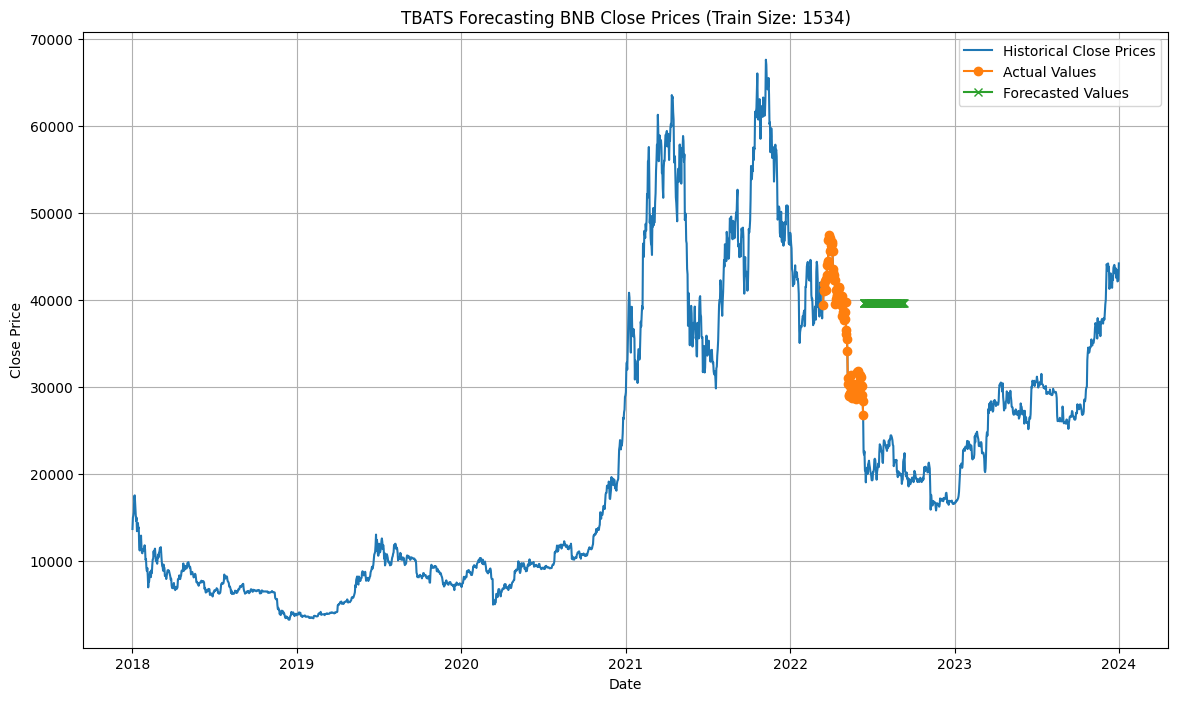

/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1753, RMSE: 2109.01, MSE: 4447910.68, MAPE: 11.46%, MAE: 1984.60


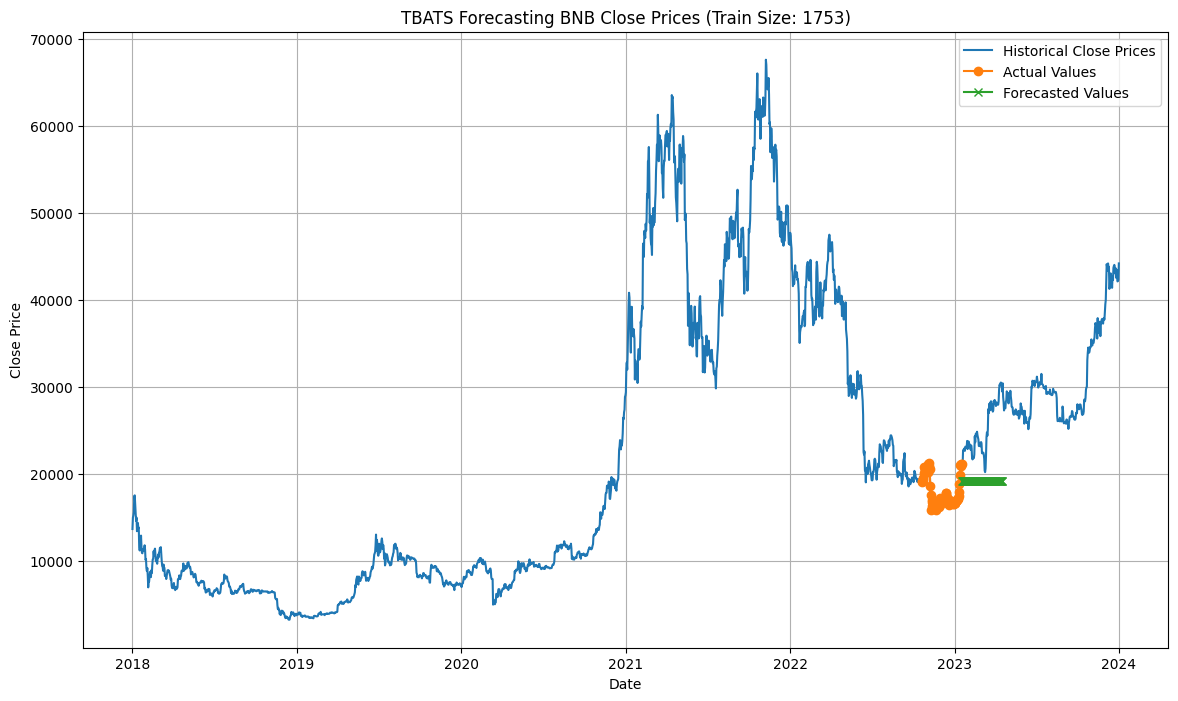

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/BTC-USD.csv')

# Chuyển đổi cột ngày tháng sang datetime và sắp xếp dữ liệu theo ngày tháng
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Chọn cột giá đóng cửa làm dữ liệu
close_prices = df['Close']

# Hàm tính Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm đánh giá và vẽ biểu đồ
def evaluate_and_plot(train_size, seasonal_periods=[1, 30], forecast_horizon=[30, 60, 90]):
    # Chia dữ liệu thành train và test theo tỷ lệ train_size
    train_size = int(len(close_prices) * train_size)
    train_data = close_prices[:train_size]
    test_data = close_prices[train_size:]

    # Huấn luyện mô hình TBATS
    model = TBATS(seasonal_periods=seasonal_periods)
    model_fit = model.fit(train_data)

    # Dự đoán giá đóng cửa
    forecasts = model_fit.forecast(steps=max(forecast_horizon))

    # Lấy giá trị thực tế của test_data
    actual_values = np.array(test_data[:max(forecast_horizon)])

    # Tính toán các độ đo
    rmse = np.sqrt(mean_squared_error(actual_values, forecasts[:len(actual_values)]))
    mse = mean_squared_error(actual_values, forecasts[:len(actual_values)])
    mape = mean_absolute_percentage_error(actual_values, forecasts[:len(actual_values)])
    mae = mean_absolute_error(actual_values, forecasts[:len(actual_values)])

    # In kết quả đánh giá
    print(f"Train Size: {train_size}, RMSE: {rmse:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, MAE: {mae:.2f}")

    # Vẽ biểu đồ dự đoán và giá trị thực tế
    plt.figure(figsize=(14, 8))
    plt.plot(df['Date'], close_prices, label='Historical Close Prices')
    plt.plot(df['Date'][train_size:train_size+len(actual_values)], actual_values, label='Actual Values')

    forecast_dates = [df['Date'][train_size + len(actual_values) - 1] + pd.DateOffset(days=d) for d in range(1, max(forecast_horizon) + 1)]
    plt.plot(forecast_dates, forecasts, label='Forecasted Values')

    plt.title(f'TBATS Forecasting BNB Close Prices (Train Size: {train_size})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đánh giá và vẽ biểu đồ cho các tỷ lệ train-test khác nhau
for ratio in [0.6, 0.7, 0.8]:
    evaluate_and_plot(ratio)


/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1106, RMSE: 62.61, MSE: 3920.04, MAPE: 21.57%, MAE: 51.67


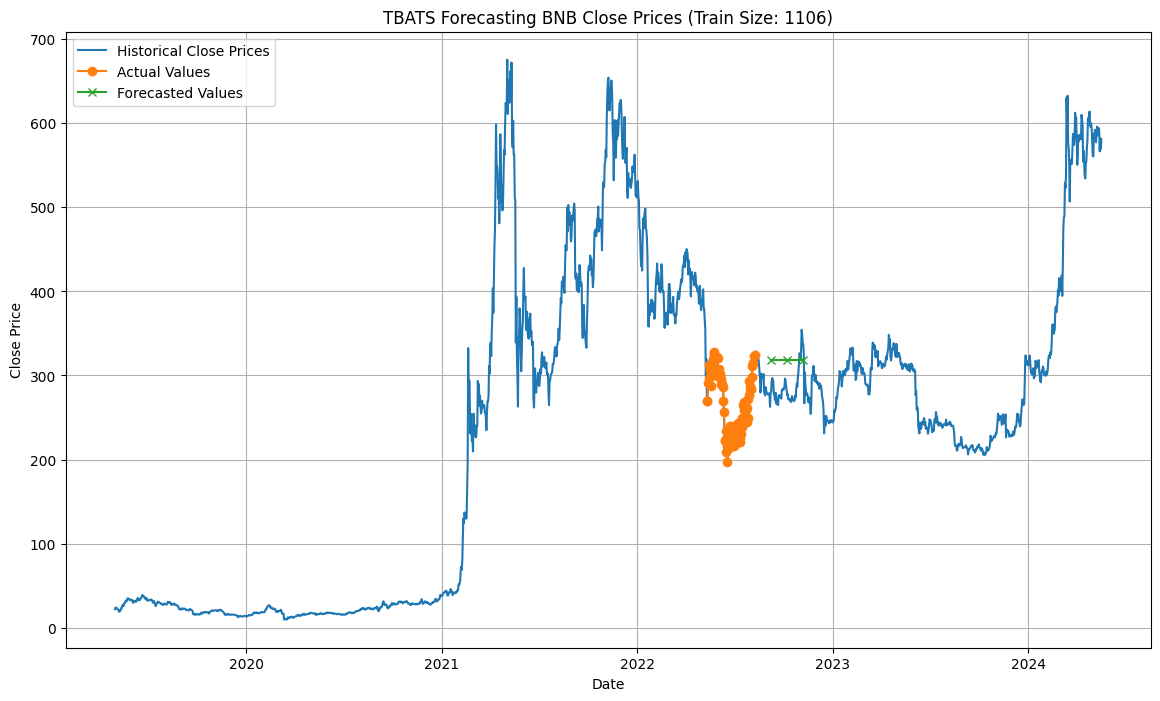

/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1290, RMSE: 30.33, MSE: 920.21, MAPE: 8.87%, MAE: 23.37


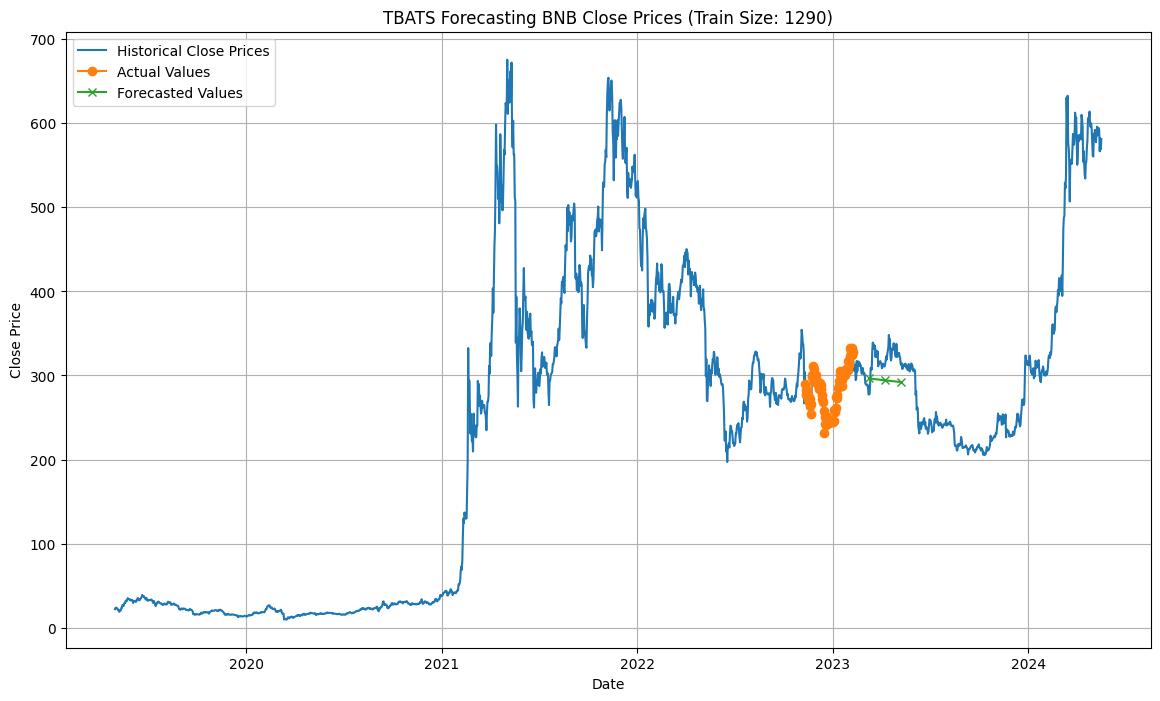

/usr/local/lib/python3.10/dist-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


Train Size: 1475, RMSE: 68.05, MSE: 4630.14, MAPE: 25.20%, MAE: 61.68


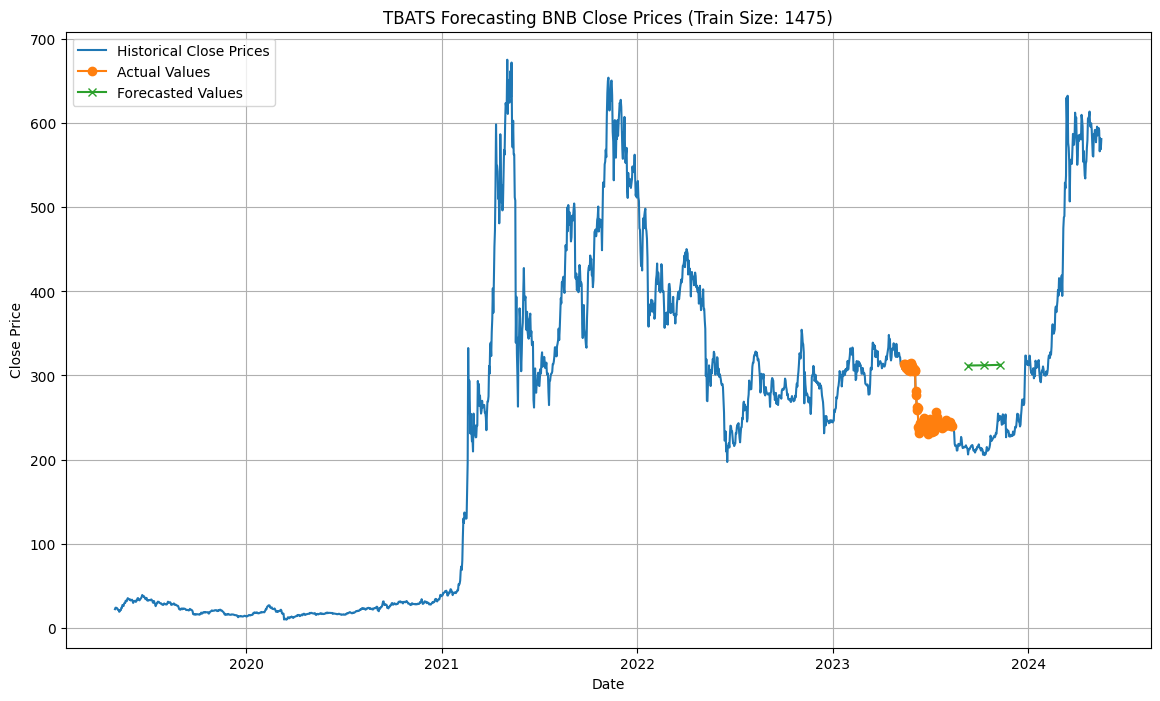

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Đọc dữ liệu từ file CSV
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    return df['Date'], df['Close']

# Hàm tính Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Huấn luyện mô hình và dự đoán
def train_and_forecast(train_data, steps, seasonal_periods):
    model = TBATS(seasonal_periods=seasonal_periods)
    model_fit = model.fit(train_data)
    return model_fit.forecast(steps=steps)

# Hàm đánh giá và vẽ biểu đồ
def evaluate_and_plot(dates, close_prices, train_size_ratio, forecast_horizons, seasonal_periods):
    train_size = int(len(close_prices) * train_size_ratio)
    train_data, test_data = close_prices[:train_size], close_prices[train_size:]

    forecasts = train_and_forecast(train_data, max(forecast_horizons), seasonal_periods)
    actual_values = np.array(test_data[:max(forecast_horizons)])

    rmse = np.sqrt(mean_squared_error(actual_values, forecasts[:len(actual_values)]))
    mse = mean_squared_error(actual_values, forecasts[:len(actual_values)])
    mape = mean_absolute_percentage_error(actual_values, forecasts[:len(actual_values)])
    mae = mean_absolute_error(actual_values, forecasts[:len(actual_values)])

    print(f"Train Size: {train_size}, RMSE: {rmse:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, MAE: {mae:.2f}")

    plt.figure(figsize=(14, 8))
    plt.plot(dates, close_prices, label='Historical Close Prices')
    plt.plot(dates[train_size:train_size+len(actual_values)], actual_values, label='Actual Values')

    forecast_dates = [dates[train_size+len(actual_values)-1] + pd.DateOffset(days=d) for d in forecast_horizons]
    plt.plot(forecast_dates, forecasts[:len(forecast_horizons)], label='Forecasted Values')

    plt.title(f'TBATS Forecasting BNB Close Prices (Train Size: {train_size})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    filepath = '/content/BNB-USD.csv'
    dates, close_prices = load_data(filepath)

    train_test_ratios = [0.6, 0.7, 0.8]
    forecast_horizons = [30, 60, 90]
    seasonal_periods = [1, 30]

    for ratio in train_test_ratios:
        evaluate_and_plot(dates, close_prices, ratio, forecast_horizons, seasonal_periods)

if __name__ == "__main__":
    main()
